In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import healpy as hp
import os
from tqdm import tqdm
sys.path.append('../../')
import pickle as pl
import scipy.optimize as op
import corner
import emcee
from getdist import plots, MCSamples
import getdist
import matplotlib
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2
from cobi.simulation import CMB, BandpassInt, Foreground, Mask, Noise, LATskyC, SATskyC
from cobi.spectra import Spectra
from cobi.calibration import Sat4Lat

In [3]:
libdir = '/global/cfs/cdirs/sobs/cosmic_birefringence/v1'
nside = 2048
cb_model = "iso"
beta = 0.35
nc = 'TOD'
alpha_lat = [0.2,0.2]
alpha_lat_errs = [0.1, 0.2]
alpha_sat_errs = [0.07, 0.1]

In [4]:
calib_arr = []
for i in range(2):
    alpha_lat_err = alpha_lat_errs[i]
    alpha_sat_err = alpha_sat_errs[i]
    lat = LATskyC(libdir, nside, cb_model, beta, alpha=alpha_lat,alpha_err=alpha_lat_err, bandpass=True,verbose=True,nsplits=2,noise_model=nc)
    sat = SATskyC(libdir, nside, cb_model, beta, alpha_err=alpha_sat_err, bandpass=False,verbose=True,nsplits=2,noise_model='TOD')
    latspectra = Spectra(lat,libdir,parallel=0,galcut=40,binwidth=5)
    satspectra = Spectra(sat,libdir,parallel=0,galcut=40,CO=False,PS=False,binwidth=5)
    c = Sat4Lat(libdir,100,3000,latspectra,satspectra,alpha_sat_errs[i],0.35)
    calib_arr.append(c)

CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Isotropic(constant) cosmic birefringence model selected
Mask : INFO - Upgrading mask LAT resolution
Noise : INFO - Noise Model: [LAT] Based on TOD and Map based simulations, directly using SO products.
CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Isotropic(constant) cosmic birefringence model selected
Mask : INFO - Upgrading mask SAT resolution
/pscratch/sd/l/lonappan/software_pkgs/cb/lib/python3.10/site-packages/so_models_v3/SO_Noise_Calculator_Public_v3_1_1.py:215: RuntimeWarning: divide by zero encountered in scalar divide
  cov_weight[i,j] += ( tube_count * N_tels /
Noise : INFO - Noise Model: [SAT] Based on TOD and Map based simulations, directly using SO products.
Spectra : INFO - Reading apodised mask from /global/cfs/cdirs/sobs/cosmic_birefringence/v1/spectra_2048_aposcale2p0/workspaces/mask_N2048_aposcale2p0_CO_PS_G40.fits
Spectra : INFO - Reading coupling Matrix from /global/cfs/cdirs/sobs/cosmic_b

Removed no burn in


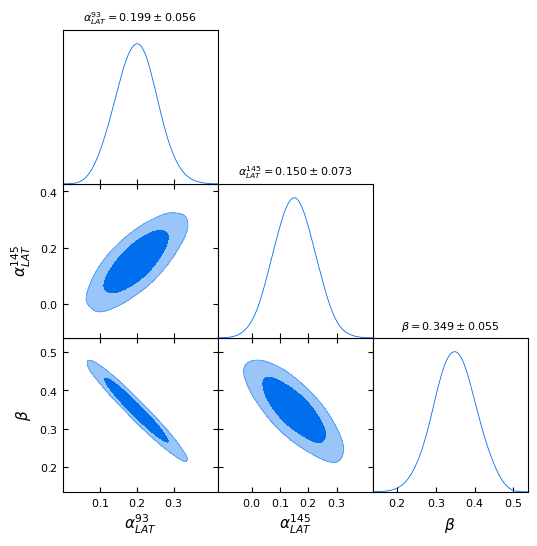

In [6]:
calib_arr[0].plot_getdist(100,2000,avoid_sat=True,beta_only=False,rerun=False)

Removed no burn in


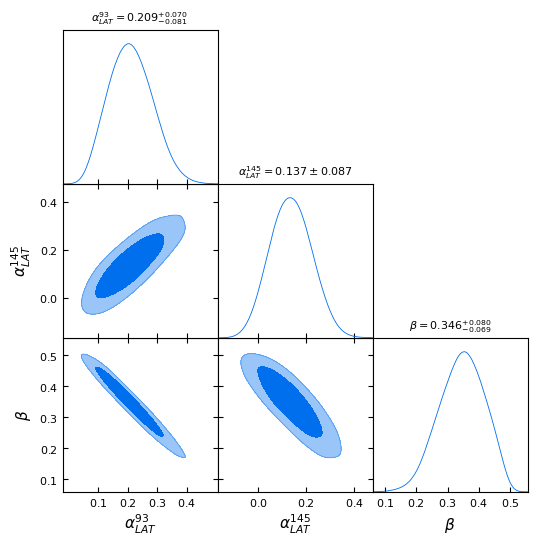

In [7]:
calib_arr[1].plot_getdist(100,2000,avoid_sat=True,beta_only=False,rerun=False)

Removed no burn in
Removed no burn in


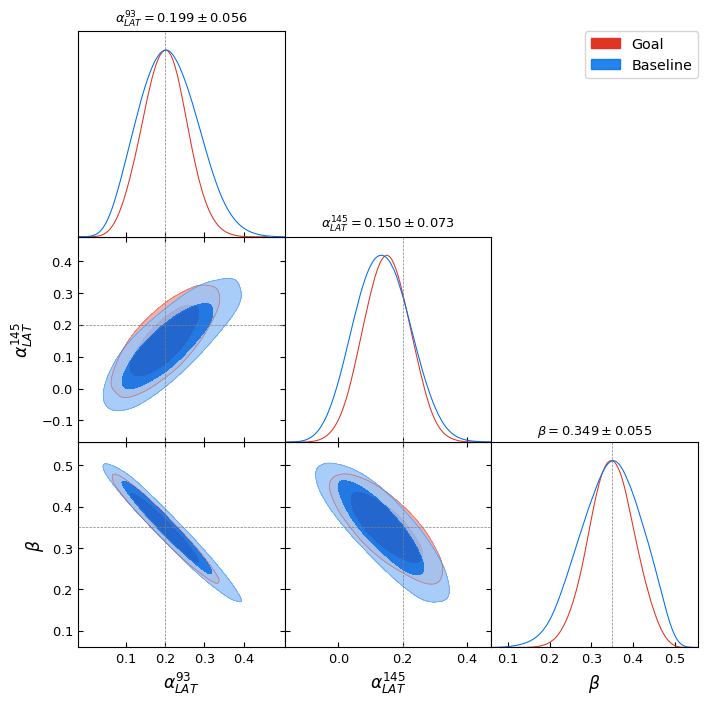

In [16]:
goal = calib_arr[0].getdist_samples(100,2000, rerun=False,label='Goal')
baseline = calib_arr[1].getdist_samples(100,2000, rerun=False,label='Baseline')
names = [item for item in calib_arr[0].__pnames__ if 'SAT' not in item]
markers = {names[0]: 0.2,names[1]: 0.2,names[2]: 0.35}
g = plots.get_subplot_plotter(width_inch=8)
g.triangle_plot([goal, baseline], names,filled=True, legend=True, title_limit=1,markers=markers)
plt.savefig('calibration_plot.pdf', bbox_inches='tight', dpi=300)

In [18]:
lat = LATskyC(libdir, nside, cb_model, beta, alpha=alpha_lat,alpha_err=alpha_lat_err, bandpass=True,verbose=True,nsplits=2,noise_model=nc)
sat = SATskyC(libdir, nside, cb_model, beta, alpha_err=alpha_sat_err, bandpass=False,verbose=True,nsplits=2,noise_model='TOD')
latspectra = Spectra(lat,libdir,parallel=0,galcut=40,binwidth=5)
satspectra = Spectra(sat,libdir,parallel=0,galcut=40,CO=False,PS=False,binwidth=5)
c = Sat4Lat(libdir,20,2000,latspectra,satspectra,alpha_sat_errs[i],0.35)

CMB : INFO - Loading CMB power spectra from file
INFO:CMB:Loading CMB power spectra from file
CMB : INFO - Isotropic(constant) cosmic birefringence model selected
INFO:CMB:Isotropic(constant) cosmic birefringence model selected
Mask : INFO - Upgrading mask LAT resolution
INFO:Mask:Upgrading mask LAT resolution
Noise : INFO - Noise Model: [LAT] Based on TOD and Map based simulations, directly using SO products.
INFO:Noise:Noise Model: [LAT] Based on TOD and Map based simulations, directly using SO products.
CMB : INFO - Loading CMB power spectra from file
INFO:CMB:Loading CMB power spectra from file
CMB : INFO - Isotropic(constant) cosmic birefringence model selected
INFO:CMB:Isotropic(constant) cosmic birefringence model selected
Mask : INFO - Upgrading mask SAT resolution
INFO:Mask:Upgrading mask SAT resolution
/pscratch/sd/l/lonappan/software_pkgs/cb/lib/python3.10/site-packages/so_models_v3/SO_Noise_Calculator_Public_v3_1_1.py:215: RuntimeWarning: divide by zero encountered in scala

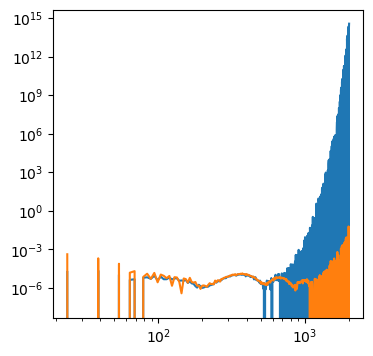

In [19]:
c.plot_spectra('SAT')

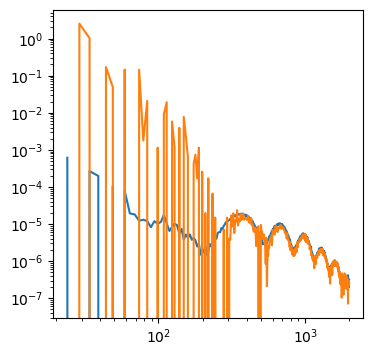

In [20]:
c.plot_spectra('LAT')